In [132]:
scoring = pd.DataFrame([
    ('Gradient Boosting model for regression', '60', '0.1455856011274198', '8', '0.1488884686721265'),
    ('Gradient Boosting model for classification', '60', '0.968882534976214', '11', '0.9639538148340889'),
], columns=['algorithm', 'number of original features', 'test metric on original features', 
            'number of selected features', 'test metric on selected features'])

scoring.T

,0,1
algorithm,Gradient Boosting model for regression,Gradient Boosting model for classification
number of original features,60,60
test metric on original features,0.1455856011274198,0.968882534976214
number of selected features,8,11
test metric on selected features,0.1488884686721265,0.9639538148340889


In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [94]:
train_raw = pd.read_csv("raw_train.csv")
submission = pd.read_csv("raw_test.csv")

In [95]:
import pandas as pd

# Assuming train_raw is your DataFrame

# Drop columns that are strings
train_raw_numeric = train_raw.select_dtypes(include=['number'])

# Replace NaN values with 0
train_raw_numeric_filled = train_raw_numeric.fillna(0)

# Convert negative values to zero
train_raw_numeric_filled = train_raw_numeric_filled.clip(lower=0)

# Now you have your DataFrame ready


In [96]:
from sklearn.model_selection import train_test_split

X = train_raw_numeric_filled.drop(columns=['__price_doc', '__churn'])
y_price = train_raw['__price_doc']
y_churn = train_raw['__churn']

In [97]:
X_train, X_test, y_price_train, y_price_test = train_test_split(X, y_price, test_size=0.3, random_state=47)
X_train1, X_test1, y_churn_train, y_churn_test = train_test_split(X, y_churn, test_size=0.3, random_state=47)

In [98]:
X

,max_floor,state,total_revolving_bal,market_count_1500,leisure_count_3000,total_ct_chng_q4_q1,railroad_station_walk_km,contacts_count_12_mon,0_17_all,trc_count_2000,...,f_radiation_raion,f_detention_facility_km,f_total_amt_chng_q4_q1,f_ecology,f_gender,f_months_inactive_12_mon,f_education_level,f_dependent_count,f_avg_open_to_buy,f_total_relationship_count
0,0.0,0.0,1906,1,0,0.694,5.419893,2,23603.0,19,...,0,4.248036,0.607,3.0,0,3,0,3,1996.9,5
1,0.0,0.0,12,0,6,0.693,3.411993,2,17700.0,8,...,0,12.649879,0.655,4.0,1,2,0,4,1338.4,3
2,0.0,0.0,2153,5,0,0.831,1.277658,2,14884.0,7,...,1,7.682303,0.851,1.0,0,2,0,4,2411.5,6
3,0.0,0.0,1806,2,0,0.638,4.291432,2,32063.0,7,...,0,8.789894,0.709,3.0,1,1,0,2,9255.9,3
4,0.0,0.0,753,2,40,0.902,0.853960,2,15237.0,17,...,1,3.779781,0.791,4.0,0,2,0,4,3318.2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20478,16.0,3.0,1377,0,0,0.762,2.585823,2,0.0,7,...,0,2.659454,0.572,3.0,1,2,0,3,10297.2,6
20479,17.0,1.0,1636,0,0,0.884,3.997038,2,0.0,0,...,0,12.213167,0.682,3.0,1,3,0,3,2649.9,6
20480,12.0,3.0,1490,2,2,0.654,8.649008,2,0.0,16,...,1,16.736130,0.810,2.0,1,3,0,1,3258.7,5
20481,17.0,3.0,1220,0,0,0.722,9.300953,2,0.0,1,...,0,31.892168,0.790,0.0,0,3,0,1,10548.1,2


# Decision tree model for regression

In [99]:
from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor(max_depth= 5 , random_state=47)
model.fit(X_train, y_price_train)


GradientBoostingRegressor(max_depth=5, random_state=47)

In [101]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Get predictions from the model
predictions = model.predict(X_test)

# Clip predictions and actual values to ensure they are non-negative
predictions_clipped = np.maximum(predictions, 0)
y_price_test_clipped = np.maximum(y_price_test, 0)

# Compute mean squared logarithmic error
decision_error = mean_squared_log_error(y_price_test_clipped, predictions_clipped)
print('mean_squared_log_error = ', decision_error)


mean_squared_log_error =  0.1455856011274198


In [102]:
reg_imp = (
    pd.Series(model.feature_importances_, index=X_train.columns)
    .to_frame(name='imp')
    .round(4)
)

reg_imp.sort_values('imp', ascending=False, inplace=True)


reg_imp

,imp
full_sq,0.4714
office_sqm_5000,0.1499
sport_count_2000,0.0693
state,0.0245
leisure_count_5000,0.0205
detention_facility_km,0.0187
trc_count_2000,0.0176
metro_km_walk,0.0173
leisure_count_3000,0.0172
railroad_station_walk_km,0.0172


In [103]:
len(reg_imp)

60

<Axes: >

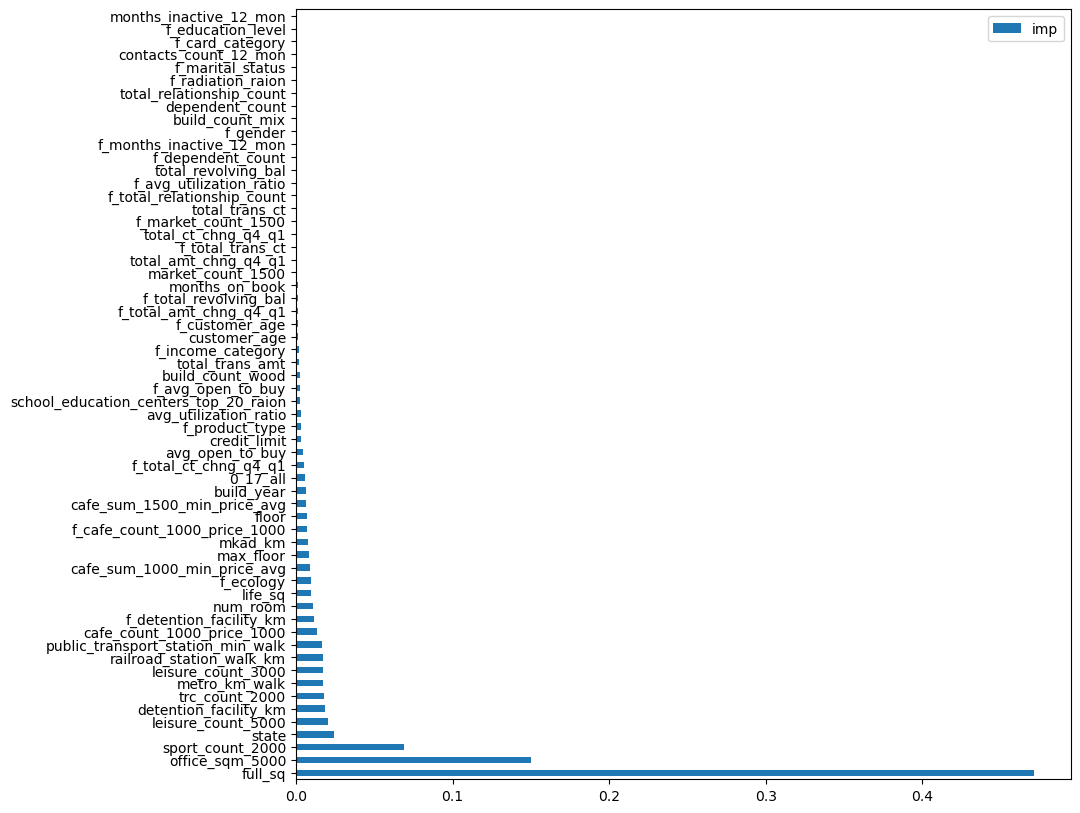

In [104]:
reg_imp.plot(kind='barh', figsize=(10, 10))

# select the best features

In [108]:
model_after = GradientBoostingRegressor(max_depth= 5 , random_state=47)
X_train_selected = X_train[['full_sq', 'sport_count_2000', 'office_sqm_5000', 'mkad_km', 'detention_facility_km', 'leisure_count_3000','state','leisure_count_5000']]
model_after.fit(X_train_selected, y_price_train)

GradientBoostingRegressor(max_depth=5, random_state=47)

# mean squared log error

In [109]:
X_test_selected = X_test[['full_sq', 'sport_count_2000', 'office_sqm_5000', 'mkad_km', 'detention_facility_km', 'leisure_count_3000','state','leisure_count_5000']]
decision_error = mean_squared_log_error(y_price_test, model_after.predict(X_test_selected))
print('mean_squared_log_error = ' , decision_error )

mean_squared_log_error =  0.1488884686721265


# Random forest for classification

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=70 , max_depth = 8 , random_state=47)
clf.fit(X_train1 ,y_churn_train )

GradientBoostingClassifier(max_depth=8, n_estimators=70, random_state=47)

In [111]:
from sklearn.metrics import roc_auc_score

random_error = roc_auc_score(y_churn_test, clf.predict_proba(X_test1)[:, 1])
print('roc_auc_score :' , random_error )

roc_auc_score : 0.968882534976214


In [112]:
clf_imp = (
    pd.Series(clf.feature_importances_, index=X_train1.columns)
    .to_frame(name='imp')
    .round(4)
)

clf_imp.sort_values('imp', ascending=False, inplace=True)


clf_imp

,imp
contacts_count_12_mon,0.3722
total_ct_chng_q4_q1,0.1014
f_total_ct_chng_q4_q1,0.0478
total_trans_amt,0.0477
total_trans_ct,0.0315
f_total_trans_ct,0.0286
f_total_relationship_count,0.0277
total_revolving_bal,0.0232
credit_limit,0.0208
total_relationship_count,0.0203


<Axes: >

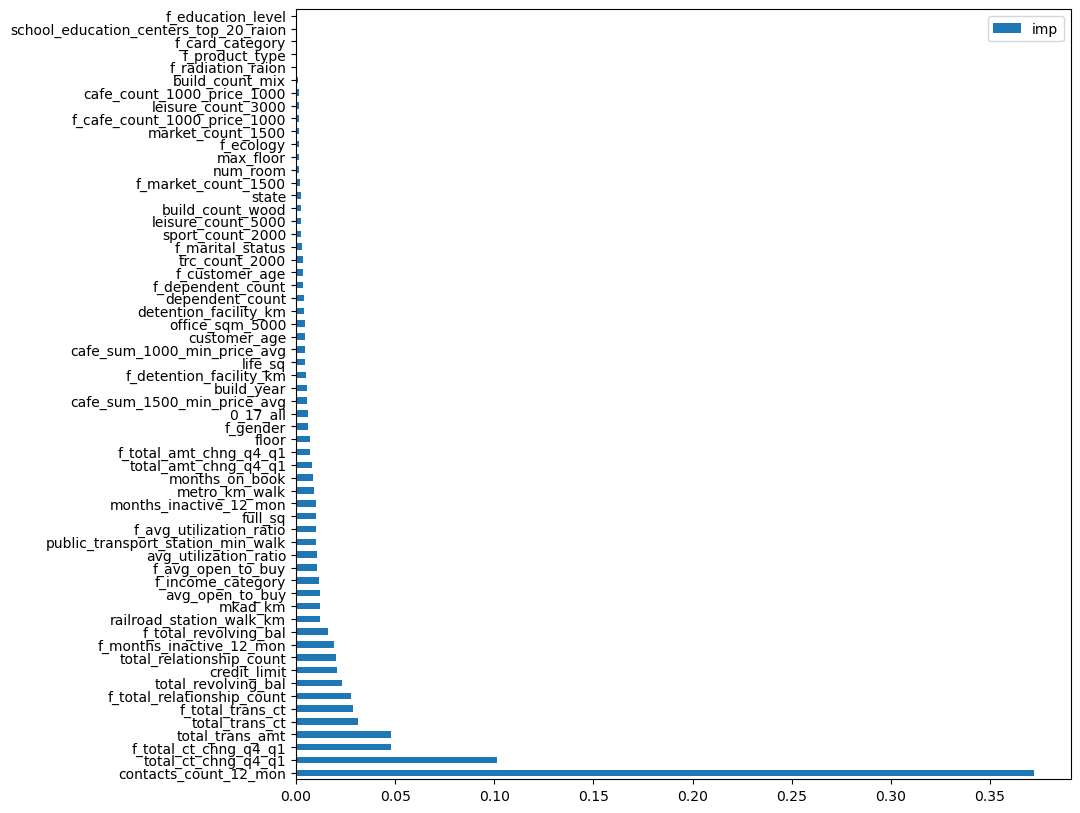

In [113]:
clf_imp.plot(kind='barh', figsize=(10, 10))

# select best feature

In [116]:
clf_after = GradientBoostingClassifier(n_estimators=70 , max_depth = 8 , random_state=47)
X_train1_selected = X_train[['contacts_count_12_mon', 'total_ct_chng_q4_q1', 'total_trans_ct', 'total_relationship_count', 'months_inactive_12_mon','total_revolving_bal','total_amt_chng_q4_q1','avg_utilization_ratio','avg_open_to_buy','credit_limit','f_total_ct_chng_q4_q1']]
clf_after.fit(X_train1_selected ,y_churn_train )

GradientBoostingClassifier(max_depth=8, n_estimators=70, random_state=47)

In [117]:
X_test1_selected = X_test1[['contacts_count_12_mon', 'total_ct_chng_q4_q1', 'total_trans_ct', 'total_relationship_count', 'months_inactive_12_mon','total_revolving_bal','total_amt_chng_q4_q1','avg_utilization_ratio','avg_open_to_buy','credit_limit','f_total_ct_chng_q4_q1']]
random_error = roc_auc_score(y_churn_test, clf_after.predict_proba(X_test1_selected)[:, 1])
print('roc_auc_score :' , random_error )

roc_auc_score : 0.9639538148340889


In [118]:
def alg1(x):
    """
    Algorithm version 1
    """
    return x['__price_predict']

In [119]:
submission_selected_clf = submission[['contacts_count_12_mon', 'total_ct_chng_q4_q1', 'total_trans_ct', 'total_relationship_count', 'months_inactive_12_mon','total_revolving_bal','total_amt_chng_q4_q1','avg_utilization_ratio','avg_open_to_buy','credit_limit','f_total_ct_chng_q4_q1']]
classification_predictions = clf_after.predict_proba(submission_selected_clf)
probability = classification_predictions[:, 1]

In [127]:
submission_selected_reg = submission[['full_sq', 'sport_count_2000', 'office_sqm_5000', 'mkad_km', 'detention_facility_km', 'leisure_count_3000','state','leisure_count_5000']]
submission_selected_reg_filled = submission_selected_reg.fillna(submission_selected_reg.mean())
regression_predictions = model_after.predict(submission_selected_reg_filled)

In [128]:
submission['__price_predict']=regression_predictions
submission['__churn_prob']=probability
submission['__priority'] = submission.apply(alg1, axis=1)

In [129]:
columns_to_keep = ['__price_predict', '__churn_prob','__priority']
submission = submission.drop(columns=submission.columns.difference(columns_to_keep))
submission.head()

,__price_predict,__churn_prob,__priority
0,8.437985,0.967914,8.437985
1,5.632653,0.001242,5.632653
2,5.620615,0.006623,5.620615
3,4.815342,0.001363,4.815342
4,17.488294,0.001135,17.488294


In [130]:
submission.to_csv('4-Albert_Dovlo.csv', index=False)